<h1 style='color:#15284C; font-size:30px'><center>Project Thesis - Secondary Data</center></h1>

<h3 style='color:#15284C;'><center> Secondary Data </center></h3>

<h3 style='color:#15284C;'> Import Dependencies </h3>

In [1]:
#array ,linear algebra, fourier transform, and matrices.
import numpy as np
# merging, reshaping, selecting, as well as data cleaning, and data wrangling features.
import pandas as pd
#data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
#importing databse
import sqlite3

#regular expression
import re
%matplotlib inline 

#natural language processing library
import nltk

#lemmatization
from nltk.stem import WordNetLemmatizer
#stemming
from nltk.stem import PorterStemmer
#word tokenization
from nltk import word_tokenize
#sentence tokenization
from nltk import sent_tokenize

#part of speect tagging
from nltk import pos_tag

#remove stop word in english
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
#library to remove punctuation

#string
import string

#Sentiment Analysis 
from textblob import TextBlob

#emojiii
import emoji
#box plot in feedback analysis
import plotly.express as px

#implement data preprocessing and train the model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score
from sklearn import naive_bayes

<h3 style='color:#15284C;'> Load Dataset </h3>

In [2]:
#read dataset
data = pd.read_excel('dataset/secondary_data.xlsx')
pd.set_option('display.max_columns', None)

In [3]:
#check data
data.tail(5)

,Timestamp,Gender,Webcam status during class,Mic status during class,Which device do you use for online classes?,Did you face any of the following issues after the initiation of online classes?,Are you able to understand the concepts through online classes?,Which teaching methodology do you prefer?,Are you interested in attending online classes?,If you are given a choice between online classes and offline classes which one will you choose?,Comments on online classes
741,2020-09-09 15:49:53.852,Male,On (All the time),Always On,Laptop,Stress,Yes,Presentations (ppt),No,Offline classes,NaN
742,2020-09-09 15:50:29.207,Male,On (All the time),Always On,Laptop,Stress,Yes,Presentations (ppt),No,Offline classes,NaN
743,2020-09-09 15:50:44.430,Male,On (All the time),Always On,Laptop,Stress,No,Presentations (ppt),No,Offline classes,NaN
744,2020-09-09 15:51:03.230,Male,On (All the time),Always On,Laptop,Stress,Yes,Presentations (ppt),No,Offline classes,NaN
745,2020-09-09 15:51:17.729,Male,On (All the time),Always On,Laptop,Stress,Yes,Black board teaching,No,Offline classes,NaN


<h3 style='color:#15284C;'> Data Preprocessing </h3>

In [4]:
#rename the columns
data.rename(columns={
    'Timestamp':'timestamp',
    'Gender':'gender',
    'Webcam status during class':'webcam',
    'Mic status during class':'mic',
    'Which device do you use for online classes?':'devices',
    'Did you face any of the following issues after the initiation of online classes?':'difficulties',
    'Are you able to understand the concepts through online classes?':'understanding_online_learning',
    'Which teaching methodology do you prefer?':'teaching_method',
    'Are you interested in attending online classes?':'interested_online_class',
    'If you are given a choice between online classes and offline classes which one will you choose?':'online_vs_offline',
    'Comments on online classes':'feedback'
}, inplace=True)

In [5]:
#check features name
for i in data.columns:
    print(i)

timestamp
gender
webcam
mic
devices
difficulties
understanding_online_learning
teaching_method
interested_online_class
online_vs_offline
feedback


In [6]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   timestamp                      746 non-null    datetime64[ns]
 1   gender                         746 non-null    object        
 2   webcam                         746 non-null    object        
 3   mic                            746 non-null    object        
 4   devices                        746 non-null    object        
 5   difficulties                   746 non-null    object        
 6   understanding_online_learning  746 non-null    object        
 7   teaching_method                746 non-null    object        
 8   interested_online_class        746 non-null    object        
 9   online_vs_offline              746 non-null    object        
 10  feedback                       247 non-null    object        
dtypes: datetime64[ns](1

In [7]:
#sum the dataset is null 
data.isnull().sum()

timestamp                          0
gender                             0
webcam                             0
mic                                0
devices                            0
difficulties                       0
understanding_online_learning      0
teaching_method                    0
interested_online_class            0
online_vs_offline                  0
feedback                         499
dtype: int64

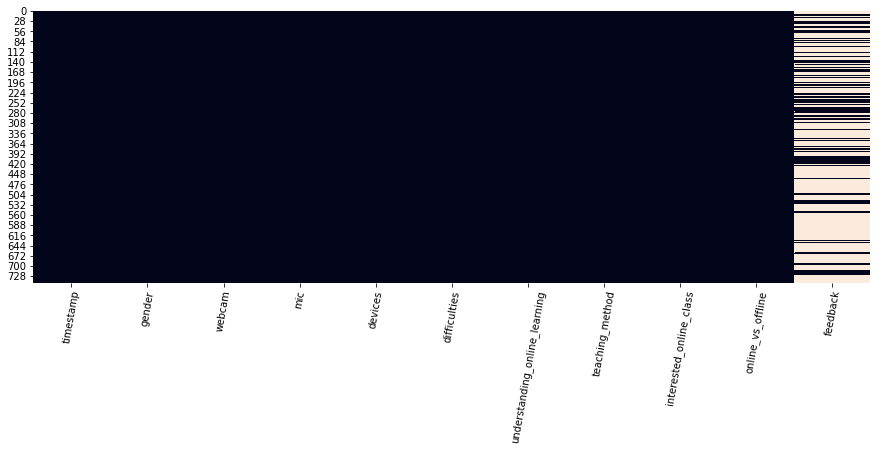

In [8]:
#check data null ft heatmap
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation='80')
plt.show()

In [9]:
#check duplicates values number
def check_duplicate_values(data):
    print("**"*54)
    print("Duplicated values, there are: ", data.duplicated().sum())
    print("**"*54)
    
#check duplicates values
#call above function

check_duplicate_values(data)

************************************************************************************************************
Duplicated values, there are:  0
************************************************************************************************************


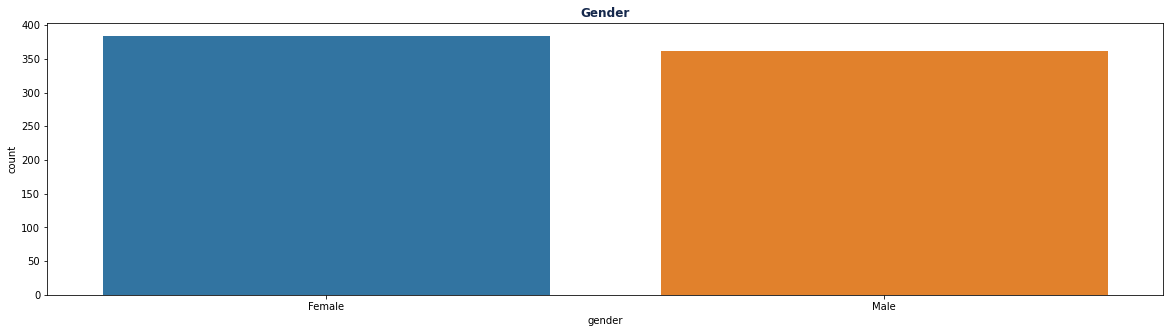

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(x='gender', data=data, order = data['gender'].value_counts().index)
plt.title('Gender', fontweight='bold', color='#15284C')
#plt.xticks(rotation='45')
plt.show()

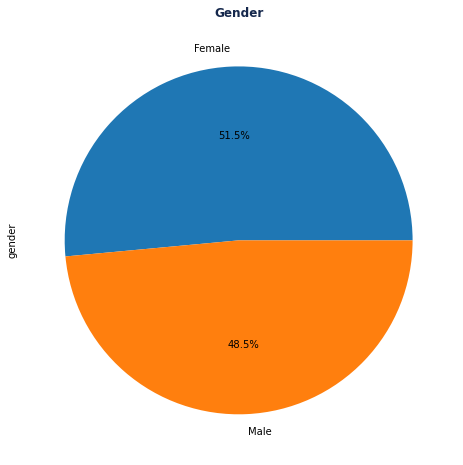

In [11]:
plt.figure(figsize=(8,8))
data['gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender', fontweight='bold', color='#15284C')
plt.show()

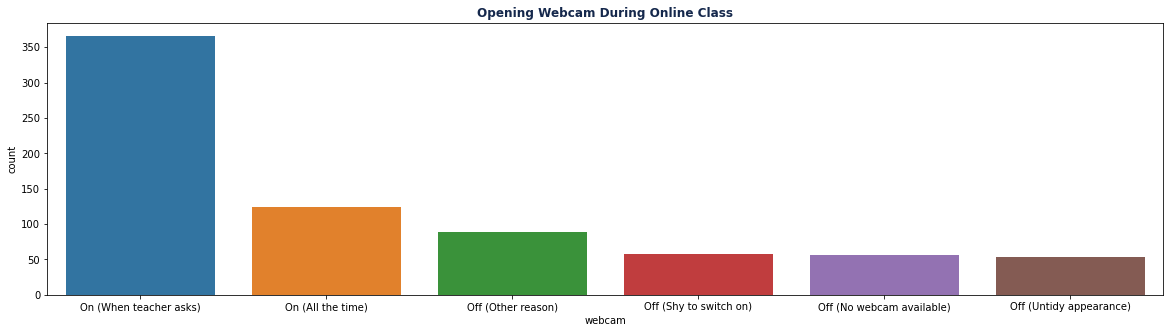

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(x='webcam', data=data, order = data['webcam'].value_counts().index)
plt.title('Opening Webcam During Online Class', fontweight='bold', color='#15284C')
#plt.xticks(rotation='45')
plt.show()

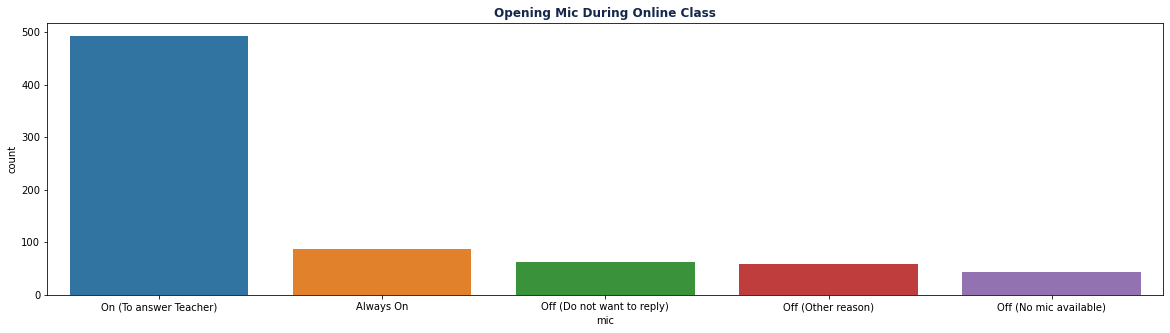

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(x='mic', data=data,order = data['mic'].value_counts().index)
plt.title('Opening Mic During Online Class', fontweight='bold', color='#15284C')
#plt.xticks(rotation='45')
plt.show()

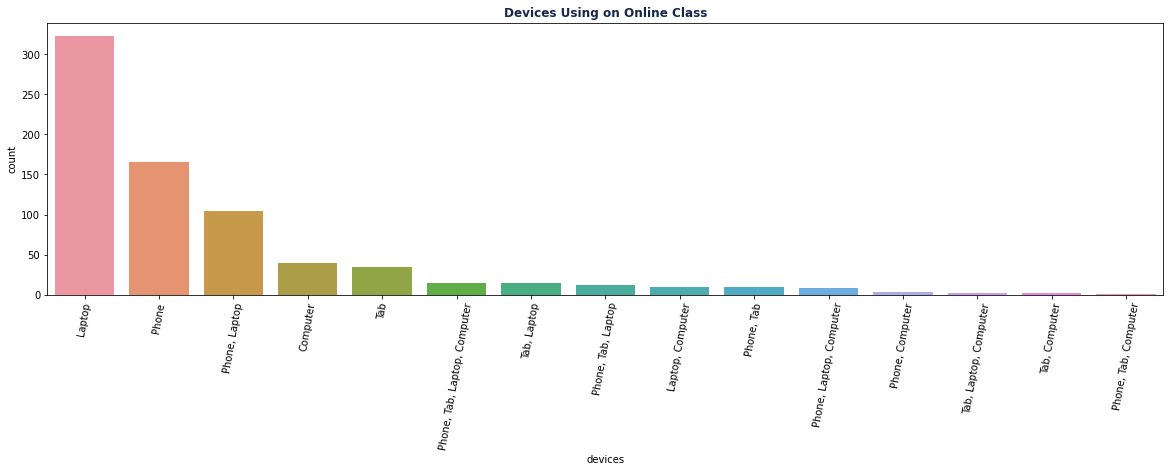

In [14]:
plt.figure(figsize=(20,5))
sns.countplot(x='devices', data=data, order = data['devices'].value_counts().index)
plt.title('Devices Using on Online Class', fontweight='bold', color='#15284C')
plt.xticks(rotation='80')
plt.show()

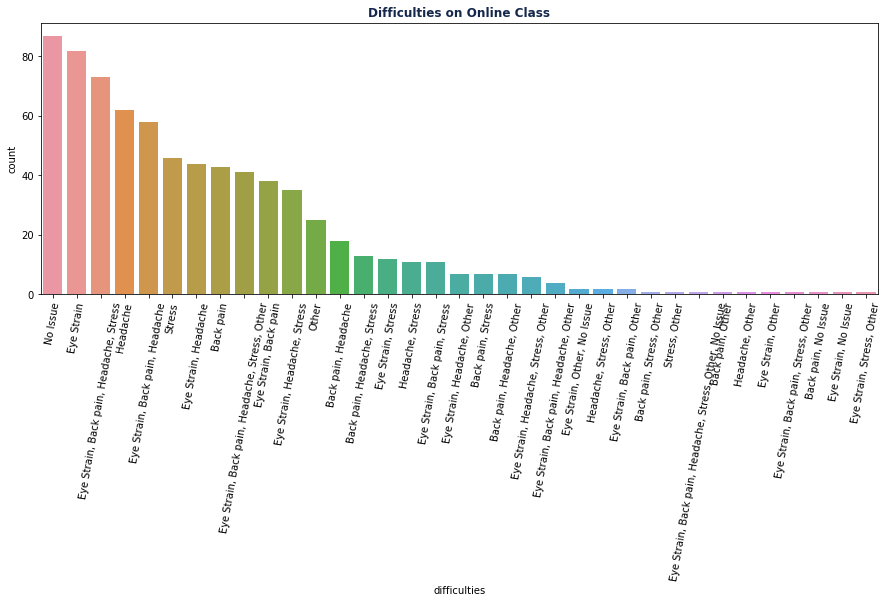

No Issue                                                    87
Eye Strain                                                  82
Eye Strain, Back pain, Headache, Stress                     73
Headache                                                    62
Eye Strain, Back pain, Headache                             58
Stress                                                      46
Eye Strain, Headache                                        44
Back pain                                                   43
Eye Strain, Back pain, Headache, Stress, Other              41
Eye Strain, Back pain                                       38
Eye Strain, Headache, Stress                                35
Other                                                       25
Back pain, Headache                                         18
Back pain, Headache, Stress                                 13
Eye Strain, Stress                                          12
Headache, Stress                                       

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x='difficulties', data=data,  order = data['difficulties'].value_counts().index)
plt.title('Difficulties on Online Class', fontweight='bold', color='#15284C')
plt.xticks(rotation='80')
#plt.xlim(-1,5.5)
plt.show()
data.difficulties.value_counts()

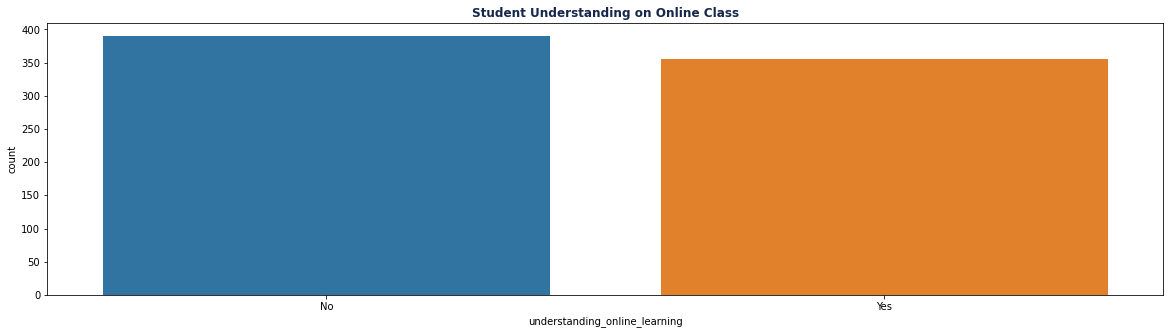

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x='understanding_online_learning', data=data,
             order = data['understanding_online_learning'].value_counts().index)
plt.title('Student Understanding on Online Class', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

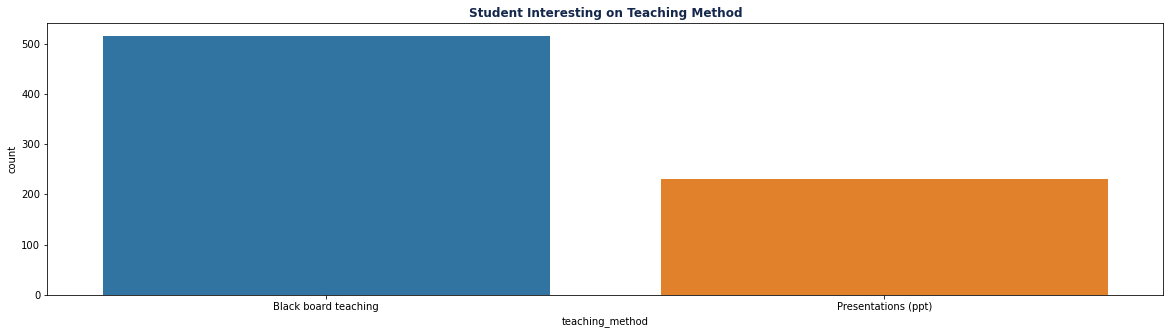

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='teaching_method', data=data,
             order = data['teaching_method'].value_counts().index)
plt.title('Student Interesting on Teaching Method', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

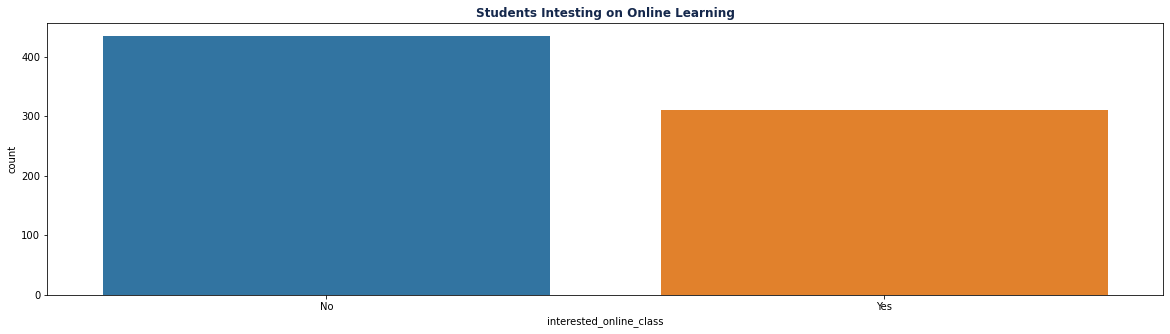

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x='interested_online_class', data=data,
             order = data['interested_online_class'].value_counts().index)
plt.title('Students Intesting on Online Learning', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

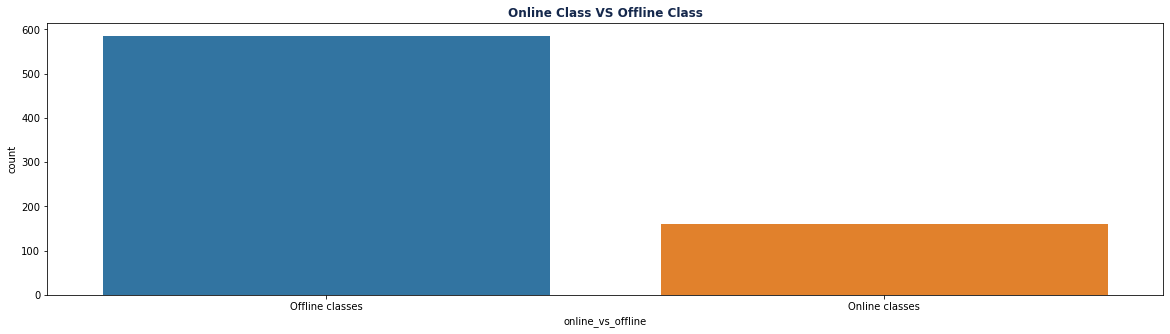

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='online_vs_offline', data=data, order = data['online_vs_offline'].value_counts().index)
plt.title('Online Class VS Offline Class', fontweight='bold', color='#15284C')
plt.xticks(rotation='0')
plt.show()

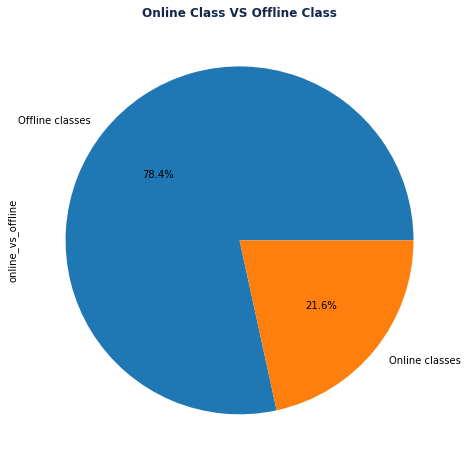

In [20]:
plt.figure(figsize=(8,8))
data['online_vs_offline'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Online Class VS Offline Class', fontweight='bold', color='#15284C')
plt.show()

In [21]:
#define a variable and copy dataset
df_sent = data['feedback']

In [22]:
#drop null values
df_sent.dropna(inplace=True)

In [23]:
#check the number of missing values
df_sent.isnull().sum()

0

In [24]:
type(df_sent)

pandas.core.series.Series

In [25]:
#convert to dataframe
df_sent = pd.DataFrame(df_sent)

In [26]:
type(df_sent)

pandas.core.frame.DataFrame

In [27]:
# Loading dictionary of smilies
def load_dict_smileys():
 
 return {
 ":-)": "smiley",
 ":)" : "smiley",
 ":D": "smiley",
 "xD": "smiley",
 ":’)" : "smiley",
 ":’D" : "smiley",
 ":3" : "smiley",
 ":]" : "smiley",
 ":^)" : "smiley",
 ":-]" : "smiley",
 ":-3" : "smiley",
 ":->" : "smiley",
 ":))" : "smiley",
 "8-)" : "cool",
 "8)" : "cool",
 "8-D" : "cool",
 "B)" : "cool",
 "BD" : "cool",
 ":-}": "smiley",
 ":>" : "smiley",
 ":}" : "smiley",
 ":o)" : "smiley",
 ":c)" : "smiley",
 "=)" : "smiley",
 "=D" : "smiley",
 "=]" : "smiley",
 ":-D" : "smiley",
 "XD" : "smiley",
 ":o" : "surprised",
 ":O" : "surprised",
 "=o" : "surprised",
 "=O" : "surprised",
 ":0" : "surprised",
 ":(" : "sad",
 ":C" : "sad",
 ":c" : "sad",
 "=(" : "sad",
 "=c" : "sad",
 "=C" : "sad",
 ":-(" : "sad",
 ":-c" : "sad",
 ":-C" : "sad",
 ":-<" : "sad",
 ":<" : "sad",
 ":[" : "sad",
 ":{" : "sad",
 ":’(" : "crying",
 ":P" : "playful",
 ":p" : "playful",
 "xP" : "playful",
 "XP": "playful",
 "=P": "playful",
 "=p" : "playful",
 "xp": "playful",
 "xb": "playful",
 "❤": "love",
 "</3": "sad",
 ":/": "worried",
 ":-/" : "worried"
}

In [28]:
#create a function to convert text into lowercase
def convert_to_lowercase(text):
    text = text.str.lower()
    return text

cachedStopWords = stopwords.words("english")
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in cachedStopWords])
    return text


#create a function to apply word tokenization
def convert_to_word_tokens(text):
    text = text.word_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_sentence_tokens(text):
    text = text.sent_tokenize(text)
    return text

#create a function to apply word tokenization
def convert_to_pos_tagging(text):
    text = text.pos_tag(text)
    return text

#calculate word length
def text_length_calculation(text):
    return len(text.split(' '))
    
#remove space
def remove_space(series):
    series.replace(" ", "", inplace=True)
    
            
#function to clean the word of any html-tags
def remove_html(sentence): 
    clean = re.compile('<.*?>')
    clean_text = re.sub(clean, ' ', sentence)
    return clean_text

#remove url from text
def remove_urls(text):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', text)

def remove_abbreviations(text):
    tokens = text.split(" ")
    j = 0
    for token in tokens:
        file_name = "<path to CSV file>"
        with open(file_name, "r") as fh:
            reader = csv.reader(fh)
            for row in reader:
                if row[0] == token:
                    tokens[j] = row[1]
                    fh.close()
                    j = j + 1
    return "".join(tokens)

# Removing smilies and emojis
def remove_emoticons(text):
    smilies = load_dict_smileys()
    split_tweet = text.split(" ")
    for key,val in smilies.items():
        if key in text:
            new_tweet = text.replace(key, val)
            text = new_tweet
            text = emoji.demojize(text)
            text = ' '.join(text.split())
    return text

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [29]:
#create a function to remove punctuation
def remove_punctuation(text):
    text = re.sub('\[.*?\]', '', str(text))
    text = re.sub('[%s]' % re.escape(string.punctuation),'', str(text))
    text = re.sub('\w*\d\w*', '', str(text))
    text = re.sub('[‘’“”…]', '', str(text))
    text = re.sub('\n', '', str(text))
    return text
remove_pun = lambda x: remove_punctuation(x)

In [30]:
#remove white space from series of the dataset
remove_space(df_sent.feedback)

In [31]:
#convert to lowercase
df_sent['feedback'] = convert_to_lowercase(df_sent.feedback)

In [32]:
#remove Punctuation

#********************************************************************************************************
#it spends much time to run
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_punctuation(x))

In [33]:
#remove stopword
#It takes much time to run.
df_sent.feedback = df_sent.feedback.apply(remove_stopwords)

In [34]:
#remove smilies

#********************************************************************************************************
#it spends much time 
#********************************************************************************************************
df_sent['feedback'] = df_sent['feedback'].apply(lambda x: remove_emoticons(x))

In [35]:
#calculate review and summanry lengthd
df_sent['feedback_length']= df_sent['feedback'].apply(text_length_calculation)

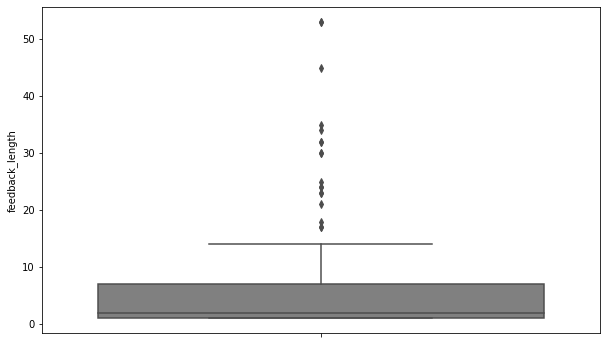

In [36]:
#check outlier of the text length
f, axes = plt.subplots(ncols=1, figsize=(10, 6))

sns.boxplot(y=df_sent['feedback_length'] ,color='grey')
plt.show()


In [37]:
df_sent.shape

(247, 2)

In [38]:
df_sent.head()

,feedback,feedback_length
1,good teaching improved,3
2,would prefer offline classes,4
8,due situation ok online classes,5
11,good ppts interesting fact sitting home attend...,11
12,think time class minimised minutes break minut...,45


In [39]:
#we use textblob python library to calculate the palority values of text

#call sentitment_polarity
polarity=[]
for i in df_sent['feedback']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [40]:
#insert the polarity values as a column
df_sent['polarity'] = polarity 

In [41]:
#check the sentment values
#if the polarity > 0 : Positive
#else the polarity < = : Negative
positive_sent = df_sent[df_sent['polarity'] >= 0]
negative_sent = df_sent[df_sent['polarity'] < 0]

In [42]:
#define the label of sentiment
df_sent['sentiment'] = df_sent['polarity'].apply(lambda x : 1 if x < 0 else 0)

In [43]:
#check the values of sentiment
print("*" * 50)
print("Positive Sentiment: ", positive_sent.shape)
print("Negative Sentiment: ", negative_sent.shape)
print("*" * 50)

**************************************************
Positive Sentiment:  (213, 3)
Negative Sentiment:  (34, 3)
**************************************************


In [44]:
df_sent.head(10)

,feedback,feedback_length,polarity,sentiment
1,good teaching improved,3,0.700000,0
2,would prefer offline classes,4,0.000000,0
8,due situation ok online classes,5,0.187500,0
11,good ppts interesting fact sitting home attend...,11,0.600000,0
12,think time class minimised minutes break minut...,45,0.136364,0
14,good,1,0.700000,0
15,great way teaching classes get lot many new em...,10,0.478788,0
18,internet always available frequent power cuts ...,10,0.300000,0
20,hate online classes waiting offline classes start,7,-0.800000,1
21,good,1,0.700000,0


In [45]:
#drop the polarity feature
df_sent.drop(['polarity', 'feedback_length'], axis=1, inplace=True)

In [46]:
df_sent.head()

,feedback,sentiment
1,good teaching improved,0
2,would prefer offline classes,0
8,due situation ok online classes,0
11,good ppts interesting fact sitting home attend...,0
12,think time class minimised minutes break minut...,0


In [47]:
df_sent.to_csv('dataset/secondary_cleaned_data.csv')